In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**IMPORTING LIBRARIES & LOADING DATAFRAME**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\dell\Downloads\Bangalore House Price Prediction Model\BHP.csv")


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# ...existing code...

In [7]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset contains 13320 rows and 9 columns


**VALUE COUNTS & MISSING VALUES**

In [10]:
for columns in df.columns:
    print(df[columns].value_counts())
    print("-"*40)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
----------------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
----------------------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: i

In [11]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64


In [13]:
df['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [14]:
df_copy = df.copy()

**EDA: CORRELATION MATRIX**

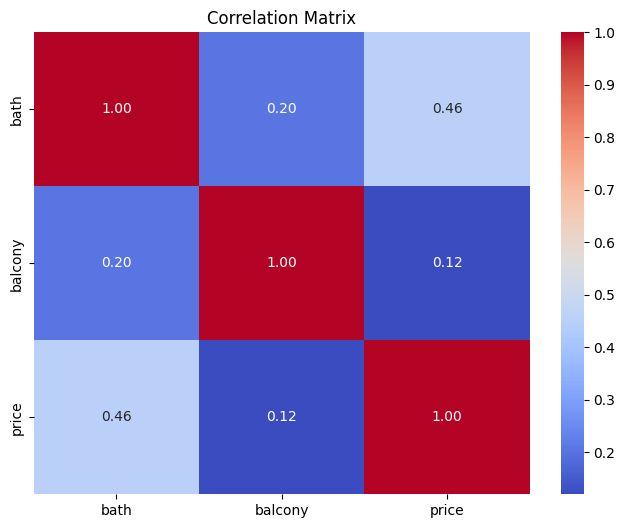

In [8]:
plt.figure(figsize=(8, 6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [16]:
df.columns.tolist()

['area_type',
 'availability',
 'location',
 'size',
 'society',
 'total_sqft',
 'bath',
 'balcony',
 'price']

**DATA CLEANING,DROP UNUSED FEATURES & IMPUTATION**

In [17]:
df =  df.drop(["society"], axis=1)

In [18]:
df["balcony"].fillna(df["balcony"].mean().round().astype(int) , inplace=True)

In [19]:
df["balcony"] = df["balcony"].round().astype(int)

In [20]:
df['balcony'].value_counts()

balcony
2    5722
1    4897
3    1672
0    1029
Name: count, dtype: int64

In [21]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [22]:
location_counts = df['location'].value_counts()

In [23]:
rare_locations = location_counts[location_counts < 10].index
df['location'] = df['location'].apply(lambda x: 'other' if x in rare_locations else x)

In [24]:
df['location'].value_counts()

location
other               2780
Whitefield           540
Sarjapur  Road       399
Electronic City      302
Kanakpura Road       273
                    ... 
Basapura              10
Dodsworth Layout      10
Kalkere               10
Ganga Nagar           10
Nagadevanahalli       10
Name: count, Length: 254, dtype: int64

In [25]:
df['location']= df['location'].fillna('Whitefield')

In [26]:
df["size"] = df['size'].fillna("2BHK")

In [27]:
df.isnull().sum()

area_type        0
availability     0
location         0
size             0
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [28]:
df['bath'] = df['bath'].fillna(df['bath'].dropna().median())

In [29]:
df["bath"].value_counts().sum()

13320

In [30]:
df['bath'].dropna().median()

2.0

In [31]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

**FEATURE ENGINEERING**

In [32]:
df['bhk']= df['size'].str.extract('(\d+)').astype(float).astype('Int64')

In [33]:
df['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13320, dtype: Int64

In [34]:
print(df['bhk'].unique())


<IntegerArray>
[2, 4, 3, 6, 1, 8, 7, 5, 11, 9, 27, 10, 19, 16, 43, 14, 12, 13, 18]
Length: 19, dtype: Int64


In [35]:
print(df['size'].unique())


['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '2BHK' '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


In [36]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [37]:
def ConvertRange(x):
    try:
        # If it's a range like '2100 - 2850'
        if '-' in str(x):
            temp = x.split('-')
            if len(temp) == 2:
                return (float(temp[0]) + float(temp[1])) / 2
        # Try to convert directly if it's a number
        return float(x)
    except:
        return None           

In [38]:
df['total_sqft']= df['total_sqft'].apply(ConvertRange)

In [39]:
df[['size', 'total_sqft']].head(10)

,size,total_sqft
0,2 BHK,1056.0
1,4 Bedroom,2600.0
2,3 BHK,1440.0
3,3 BHK,1521.0
4,2 BHK,1200.0
5,2 BHK,1170.0
6,4 BHK,2732.0
7,4 BHK,3300.0
8,3 BHK,1310.0
9,6 Bedroom,1020.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13274 non-null  float64
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  int64  
 7   price         13320 non-null  float64
 8   bhk           13320 non-null  Int64  
dtypes: Int64(1), float64(3), int64(1), object(4)
memory usage: 949.7+ KB


In [41]:
df['price'].max

<bound method Series.max of 0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64>

In [42]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1,51.00,2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13274 non-null  float64
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  int64  
 7   price         13320 non-null  float64
 8   bhk           13320 non-null  Int64  
dtypes: Int64(1), float64(3), int64(1), object(4)
memory usage: 949.7+ KB


In [44]:
df["price_per_sqft"]= df['price']*100000 / df['total_sqft']

In [45]:
df["price_per_sqft"]

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [46]:
print(df[['balcony', 'price']].corr())

          balcony     price
balcony  1.000000  0.124951
price    0.124951  1.000000


In [47]:
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.0,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.0,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.0,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.0,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.0,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.0,1.200000e+07


In [48]:
(df['total_sqft']/ df['bhk']).describe()

count       13274.0
mean     575.074878
std      388.205175
min            0.25
25%      473.333333
50%           552.5
75%           625.0
max         26136.0
dtype: Float64

In [49]:
df= df[((df['total_sqft']/ df['bhk']) >= 300 ) ]
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.0,12530.000000
mean,1594.564544,2.559537,1.604629,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,0.796238,152.077329,0.976678,4162.237981
min,300.000000,1.000000,0.000000,8.440000,1.0,267.829813
25%,1116.000000,2.000000,1.000000,49.000000,2.0,4210.526316
50%,1300.000000,2.000000,2.000000,70.000000,3.0,5294.117647
75%,1700.000000,3.000000,2.000000,115.000000,3.0,6916.666667
max,52272.000000,16.000000,3.000000,3600.000000,16.0,176470.588235


In [50]:
df.shape

(12530, 10)

In [51]:
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**VISUALIZATION: DISTRIBUTIONS**

<Axes: xlabel='price_per_sqft', ylabel='Density'>

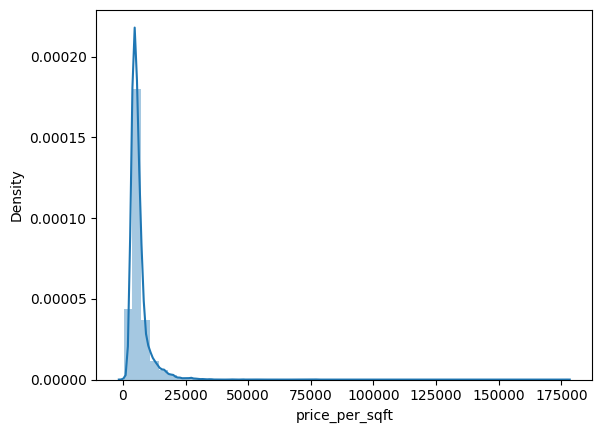

In [52]:
sns.distplot(df["price_per_sqft"])

In [53]:
df[df["price_per_sqft"]>25000].count()

area_type         79
availability      79
location          79
size              79
total_sqft        79
bath              79
balcony           79
price             79
bhk               79
price_per_sqft    79
dtype: int64

In [54]:
df1 = df[df["price_per_sqft"] <= 25000]
df1

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0,231.00,5,6689.834926
13316,Super built-up Area,Ready To Move,other,4 BHK,3600.0,5.0,2,400.00,4,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1,60.00,2,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689.0,4.0,1,488.00,4,10407.336319


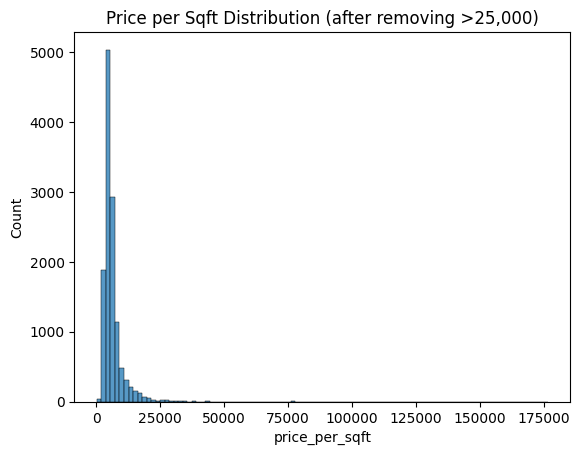

In [55]:
sns.histplot(df["price_per_sqft"], bins=100)
plt.title("Price per Sqft Distribution (after removing >25,000)")
plt.show()


**REMOVING OUTLIERS USING CAPPING**

In [56]:
# Cap high outliers in price_per_sqft at 25,000
cap_value = 25000
df['price_per_sqft'] = df['price_per_sqft'].apply(lambda x: cap_value if x > cap_value else x)

In [57]:
lower_cap = 500
df['price_per_sqft'] = df['price_per_sqft'].apply(
    lambda x: lower_cap if x < lower_cap else x
)

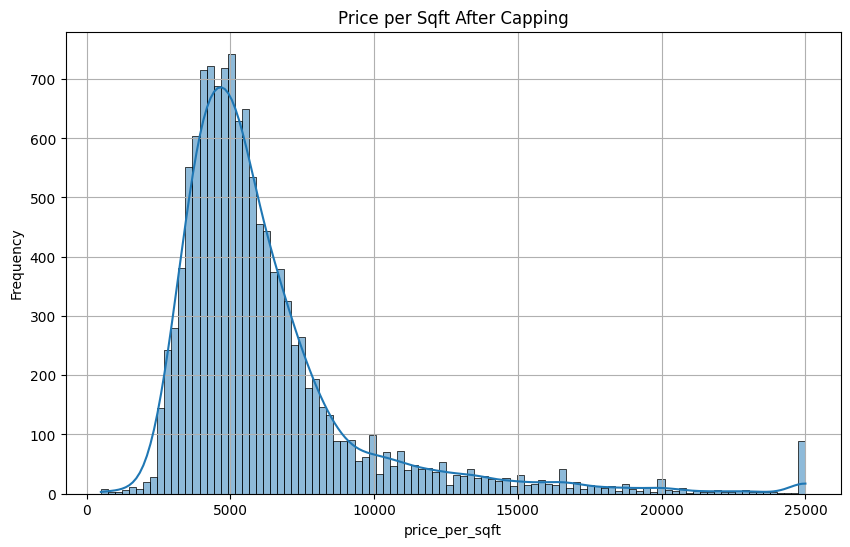

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=100, kde=True)
plt.title("Price per Sqft After Capping")
plt.xlabel("price_per_sqft")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [59]:
print("Max price_per_sqft after capping:", df['price_per_sqft'].max())
print("Min price_per_sqft after capping:", df['price_per_sqft'].min())

Max price_per_sqft after capping: 25000.0
Min price_per_sqft after capping: 500.0


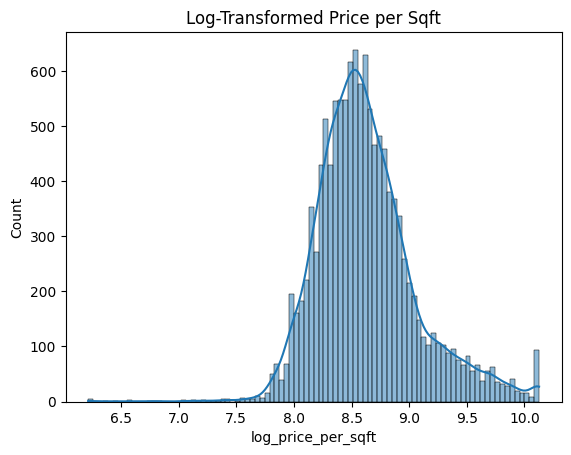

In [60]:
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title("Log-Transformed Price per Sqft")
plt.show()


In [61]:
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,log_price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.0,12530.000000,12530.000000
mean,1594.564544,2.559537,1.604629,111.382401,2.650838,6242.991723,8.631979
std,1261.271296,1.077938,0.796238,152.077329,0.976678,3485.502217,0.436392
min,300.000000,1.000000,0.000000,8.440000,1.0,500.000000,6.216606
25%,1116.000000,2.000000,1.000000,49.000000,2.0,4210.526316,8.345580
50%,1300.000000,2.000000,2.000000,70.000000,3.0,5294.117647,8.574540
75%,1700.000000,3.000000,2.000000,115.000000,3.0,6916.666667,8.841834
max,52272.000000,16.000000,3.000000,3600.000000,16.0,25000.000000,10.126671


<Axes: xlabel='bhk', ylabel='Density'>

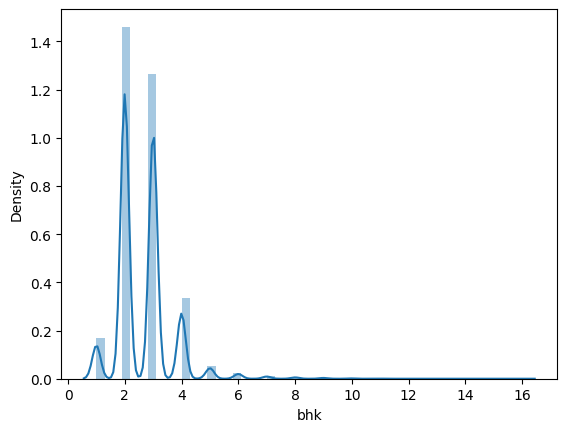

In [62]:
sns.distplot(df["bhk"])

In [63]:
#caping bhk values at 8
df['bhk'] = df['bhk'].apply(lambda x: 8 if x > 8 else x)


In [64]:
print("Max bhk after capping:", df['bhk'].max())
print("Min bhk after capping:", df['bhk'].min())

Max bhk after capping: 8
Min bhk after capping: 1


Max BHK after capping: 8


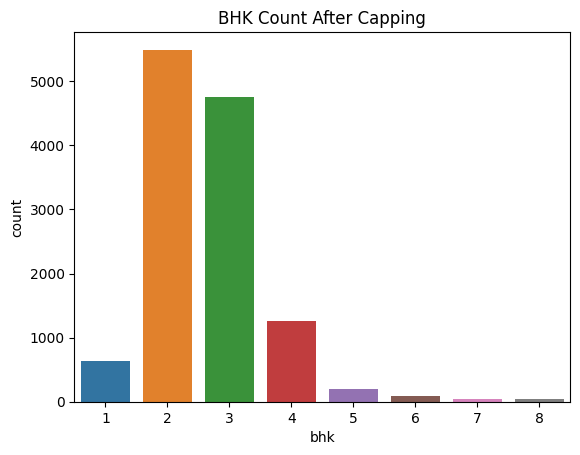

In [65]:
print("Max BHK after capping:", df['bhk'].max())
sns.countplot(x='bhk', data=df)
plt.title("BHK Count After Capping")
plt.show()


In [66]:
df.shape

(12530, 11)

In [67]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,log_price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2,3699.810606,8.216307
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4,4615.384615,8.437367
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3,4305.555556,8.367894
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3,6245.890861,8.739839
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1,51.00,2,4250.000000,8.354910
...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0,231.00,5,6689.834926,8.808494
13316,Super built-up Area,Ready To Move,other,4 BHK,3600.0,5.0,2,400.00,4,11111.111111,9.315791
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1,60.00,2,5258.545136,8.567800
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689.0,4.0,1,488.00,4,10407.336319,9.250362


In [68]:
df.drop(columns=["size", "area_type", "price_per_sqft"], inplace=True)


In [69]:
df.head()

,availability,location,total_sqft,bath,balcony,price,bhk,log_price_per_sqft
0,19-Dec,Electronic City Phase II,1056.0,2.0,1,39.07,2,8.216307
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,3,120.00,4,8.437367
2,Ready To Move,Uttarahalli,1440.0,2.0,3,62.00,3,8.367894
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,1,95.00,3,8.739839
4,Ready To Move,Kothanur,1200.0,2.0,1,51.00,2,8.354910


**ENCODING**

In [70]:
categorical_cols = ['availability', 'location']

preprocessor = ColumnTransformer(transformers=[ ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) ], remainder='passthrough')

**MODEL TRAINING SECTION**

In [71]:
X = df.drop(columns=["price"])
y = df["price"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**PIPELINE**

In [73]:
''' model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_pipeline.fit(X_train, y_train)  '''

" model_pipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('regressor', LinearRegression())\n])\n\nmodel_pipeline.fit(X_train, y_train)  "

In [74]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['availability',
                                                   'location'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [75]:
import joblib
joblib.dump(model_pipeline, 'Bangalore-project.joblib')

['Bangalore-project.joblib']

In [76]:
y_pred = model_pipeline.predict(X_test)

**MODEL EVALUATION**

In [77]:
''' 
print("Linear Regression Performance:")
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
'''

' \nprint("Linear Regression Performance:")\nprint("RMSE:", mean_squared_error(y_test, y_pred, squared=False))\nprint("MAE:", mean_absolute_error(y_test, y_pred))\nprint("R² Score:", r2_score(y_test, y_pred))\n'

In [78]:
print("Random Forest Regressor Performance:")
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Random Forest Regressor Performance:
RMSE: 23.813398006760934
MAE: 2.5305656158552816
R² Score: 0.9734654694095163


In [79]:
model_pipeline.score(X_test, y_test)

0.9734654694095163

**MODEL SCORE**

In [80]:
print("Model Score:", model_pipeline.score(X_test, y_test))

Model Score: 0.9734654694095163


**VISUAL REPRESENTATIION OF ACTUAL vs PREDICTED PRICES**

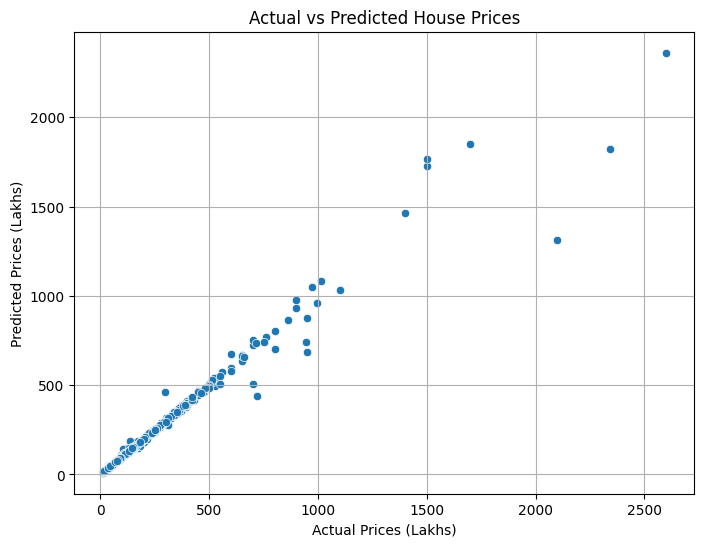

In [81]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices (Lakhs)")
plt.ylabel("Predicted Prices (Lakhs)")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

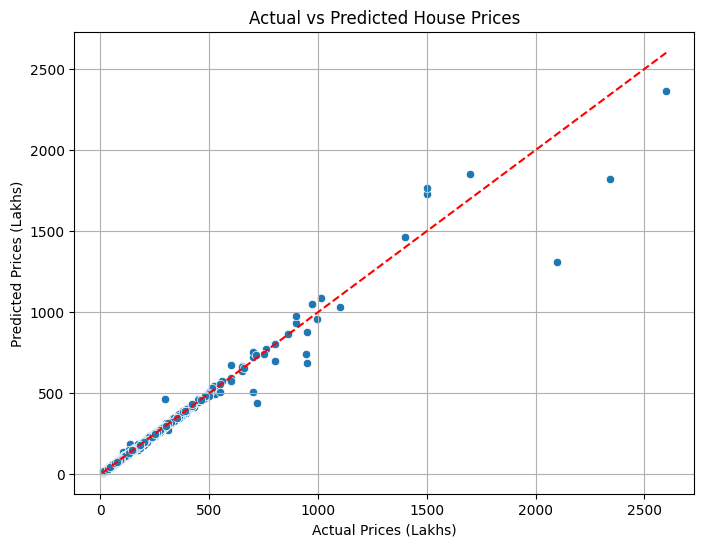

In [82]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Prices (Lakhs)")
plt.ylabel("Predicted Prices (Lakhs)")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [83]:
model_pipeline.score(X_train, y_train)  

0.9923629681562757

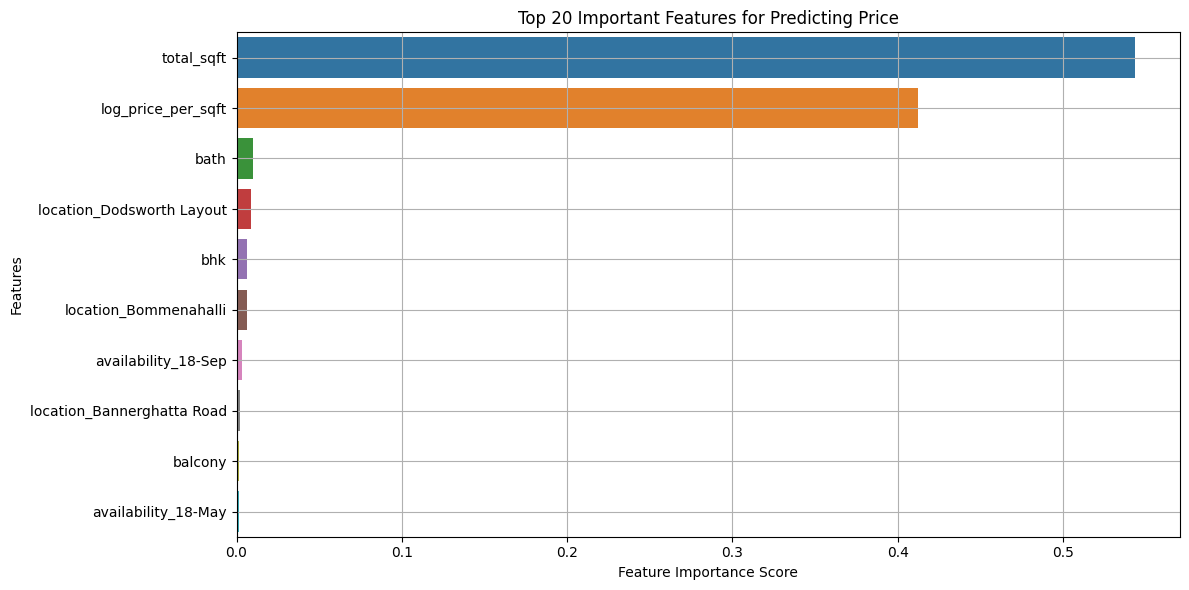

In [84]:

ohe = preprocessor.named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_cols)

numerical_features = [col for col in X.columns if col not in categorical_cols]
all_feature_names = np.concatenate([cat_features, numerical_features])

importances = model_pipeline.named_steps['regressor'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 20 Important Features for Predicting Price")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.grid(True)
plt.show()


In [85]:
l_pipeline= joblib.load("Bangalore-project.joblib")

In [86]:
print(l_pipeline.predict(X_train.iloc[[0]]))

[68.154]


In [87]:
print("Actual Price:", y_train.iloc[0])
print("Predicted Price:", l_pipeline.predict(X_train.iloc[[0]])[0])

Actual Price: 68.0
Predicted Price: 68.154


In [88]:
for i in range(5):
    actual = y_train.iloc[i]
    predicted = l_pipeline.predict(X_train.iloc[[i]])[0]
    error = abs(actual - predicted)
    print(f"Sample {i+1}: Actual: ₹{actual} Lakhs | Predicted: ₹{predicted:.2f} Lakhs | Error: ₹{error:.2f}")


Sample 1: Actual: ₹68.0 Lakhs | Predicted: ₹68.15 Lakhs | Error: ₹0.15
Sample 2: Actual: ₹108.0 Lakhs | Predicted: ₹108.02 Lakhs | Error: ₹0.02
Sample 3: Actual: ₹100.0 Lakhs | Predicted: ₹99.93 Lakhs | Error: ₹0.07
Sample 4: Actual: ₹198.0 Lakhs | Predicted: ₹197.79 Lakhs | Error: ₹0.21
Sample 5: Actual: ₹372.0 Lakhs | Predicted: ₹373.41 Lakhs | Error: ₹1.41


In [89]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='r2')
print("Cross-validated R²:", scores.mean())


Cross-validated R²: 0.9534233493277628
